<a href="https://colab.research.google.com/github/mobinapourmoshir/Functional-Deep-Learning/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vanilla Autoencoder**

Reference:https://www.geeksforgeeks.org/numpy/types-of-autoencoders/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:

# Loading the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

n = 10
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
# Defining encoder and decoder
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

decoded_imgs = autoencoder.predict(x_test_flat)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5037 - val_loss: 0.3420
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3324 - val_loss: 0.3199
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3138 - val_loss: 0.3063
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3023 - val_loss: 0.2993
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2953 - val_loss: 0.2944
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2915 - val_loss: 0.2918
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2892 - val_loss: 0.2900
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2875 - val_loss: 0.2887
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2868 - val_loss: 0.2878
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2858 - val_loss: 0.2873
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2855 - val_loss: 0.2867
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

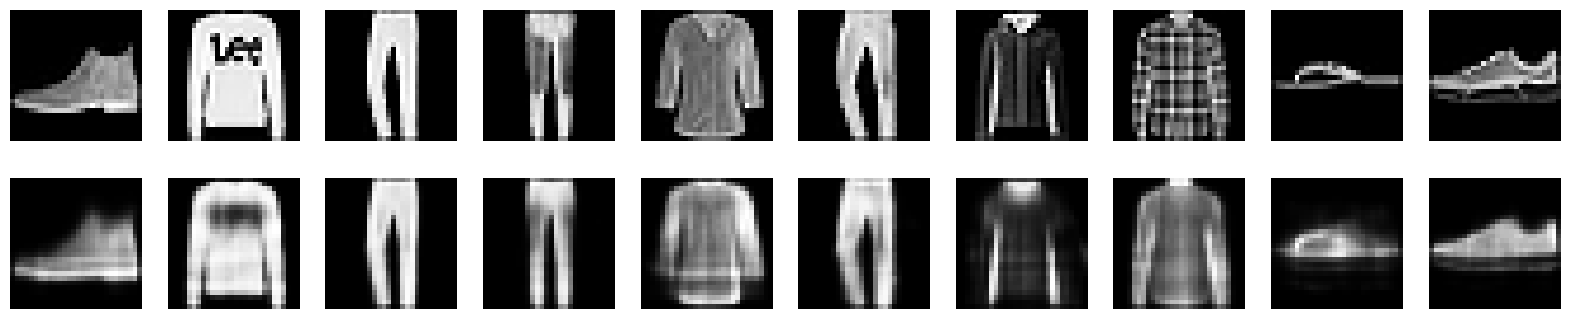

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

# **Convolutional Autoencoder**

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 273ms/step - loss: 0.4590 - val_loss: 0.2981
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 64s 271ms/step - loss: 0.2940 - val_loss: 0.2884
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 274ms/step - loss: 0.2848 - val_loss: 0.2831
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 268ms/step - loss: 0.2810 - val_loss: 0.2800
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 280ms/step - loss: 0.2773 - val_loss: 0.2779
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 288ms/step - loss: 0.2755 - val_loss: 0.2764
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 285ms/step - loss: 0.2737 - val_loss: 0.2752
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 276ms/step - loss: 0.2726 - val_loss: 0.2742
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 278ms/step - loss: 0.2719 - val_loss: 0.2732
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 277ms/step - loss: 0.2705 - val_loss: 0.2724
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 69s 294ms/step - loss: 0.2699 - val_loss: 0.2716
Epoch 12/50
235/235

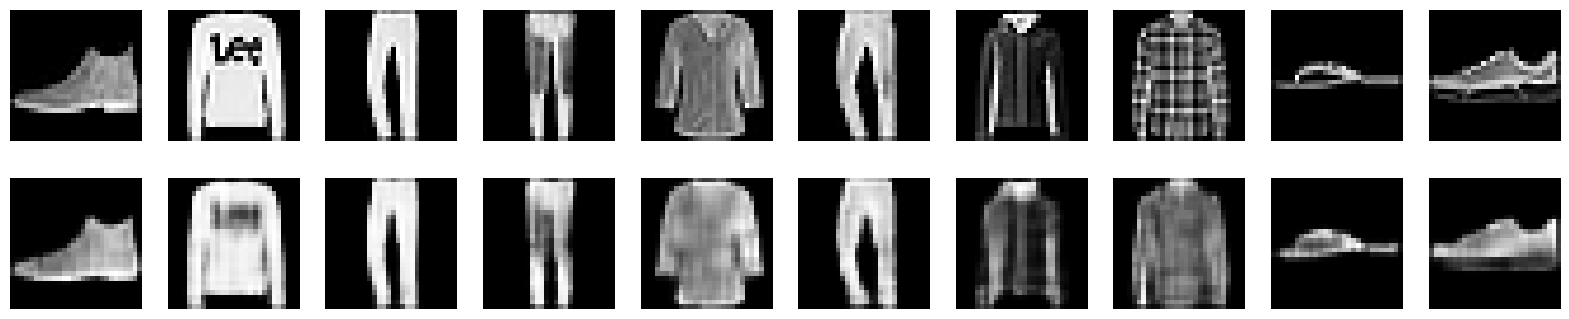

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

n = 10
input_img = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(
    16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(
    8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(
    1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = tf.keras.Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

conv_autoencoder.fit(x_train_cnn, x_train_cnn,
                     epochs=50,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test_cnn, x_test_cnn))

decoded_imgs = conv_autoencoder.predict(x_test_cnn)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

# **Denoising Autoencoder**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

n = 10
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

denoising_autoencoder = tf.keras.Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
x_test_noisy = x_test_flat + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_test_flat.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

denoising_autoencoder.fit(x_train_noisy, x_train_flat,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_flat))

decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()